Done ... jj =  0
Done ... jj =  1
Done ... jj =  2
Done ... jj =  3
Done ... jj =  4
Done ... jj =  5
Done ... jj =  6
Done ... jj =  7
Done ... jj =  8
Done ... jj =  9
Done ... jj =  10
Done ... jj =  11
Done ... jj =  12
Done ... jj =  13
Done ... jj =  14
Done ... jj =  15
Done ... jj =  16
Done ... jj =  17
Done ... jj =  18
Done ... jj =  19


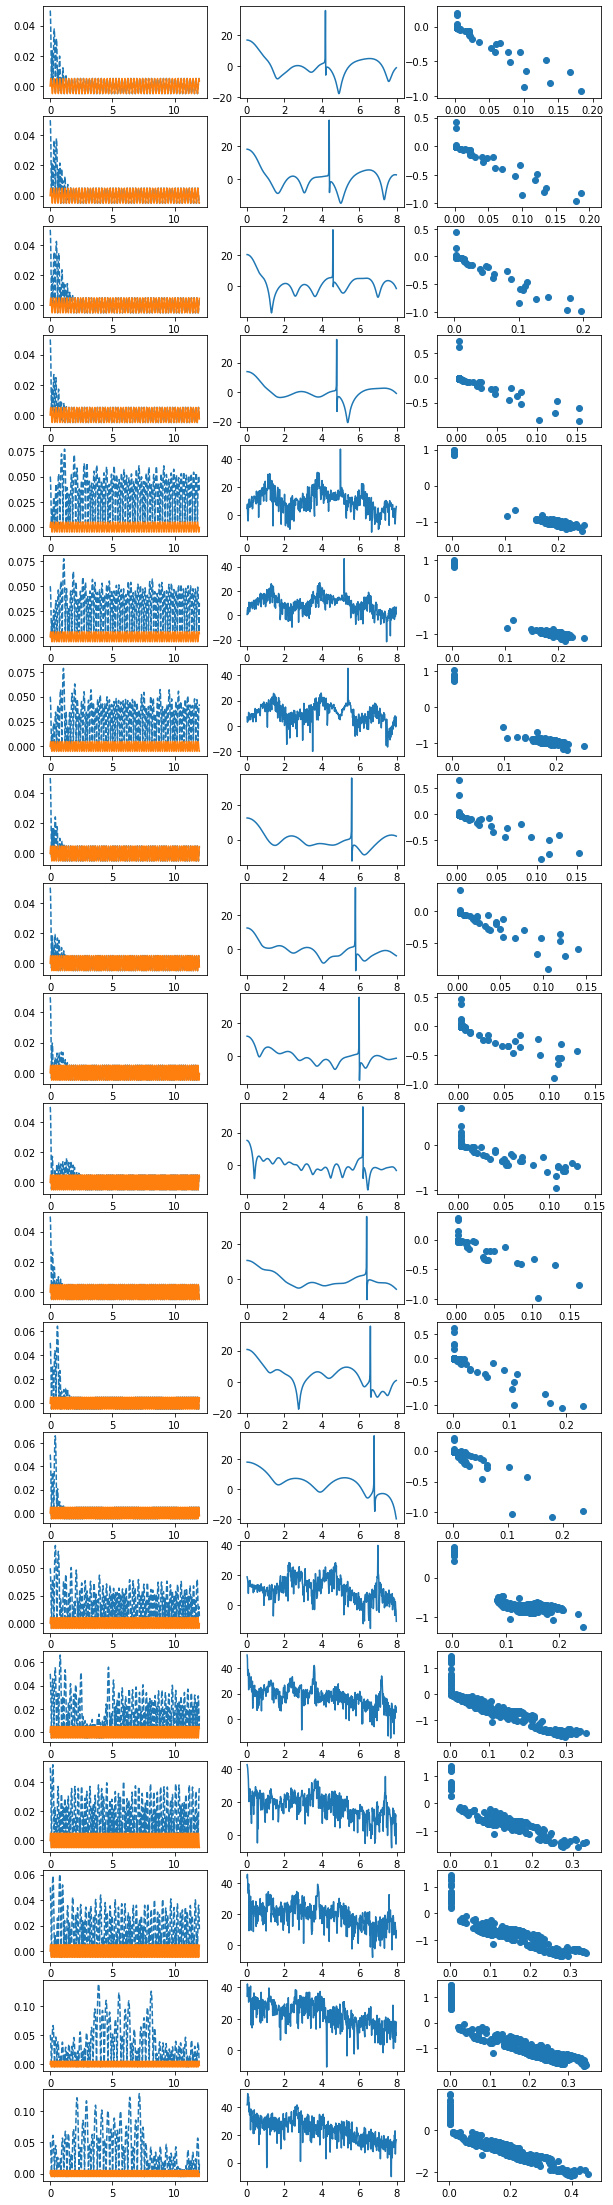

In [2]:
# simulation of a small metal ball interacting/colliding with 
# a harmonically oscillating base.
#
# EJ Brash - December, 2019
#

import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [10, 40]

# Define a function to process the collision between the ball and the base
# Inputs:
# gamma - the coefficient of restitution
# y1,y2,v1,v2 - the positions and velocities of the ball and base, respectively.
# time - the absolute time of the collision
#
# Outputs:
# h = initial height of next phase of the motion
# toffset = initial absolute time of the next phase of motion
# vzero = initial velocity of the next phase of motion
# v1new = new velocity of the ball
# y1new = new initial position of the ball
# 
def collide(gamma,time,y1,y2,v1,v2):
    vrel = v2-v1
    #print ('********',v2,v1,vrel)
    v1new = gamma*abs(vrel)+v2
    y1new = y2
    toffset = time
    vzero = v1new
    h = y1
    return h, toffset, vzero, v1new, y1new

dt = 0.0025  # time step -> 400 frames per second
g = 9.807   # gravity
A = 0.005    # amplitude of the base oscillation in meters
gamma = 0.9  # coefficient of restitution
phase = 0.0 # phase offset between dropping of the ball initially and the crest
            # of the base oscillation function.
nfreq = 20

# create subplots for plotting
fig, axes = plt.subplots(nrows=nfreq, ncols=3)

# main loop over base oscillation frequency 
for jj in range(nfreq):
    
    fs = 4.2+0.2*jj # Let fs be in the range from 4.2Hz to 8.0Hz

    nsteps = int(60.0/dt)  # assume sixty seconds of video recording.
    tslice = 5  # factor that is used to select only a portion of the time plots 
    fslice = 50 # factor that is used to select only a portion of the freq. plots

    # Set up arrays to hold useful things
    y1 = []
    y1r = []
    y2 = []
    v1 = []
    v2 = []
    v1r = []
    time = []
    f = []     
    vrel = []
    tdiff = []
    
    # Set initial conditions - drop the ball from a height of 5cm, from rest, at t=0
    vzero = 0.0
    h = 0.05
    ncol = 0
    toffset = 0.0
    t1 = 0.0

    # Loop over steps
    for i in range(nsteps+1):
        time.append(i*dt)
        f.append(i/(nsteps*dt))
        y1.append(h + vzero*(time[i]-toffset) - 0.5*g*(time[i]-toffset)**2)
        v1.append(vzero - g*(time[i]-toffset))
        y2.append(A*math.sin(2.0*math.pi*fs*time[i]+phase))
        v2.append(A*(2.0*math.pi*fs)*math.cos(2.0*math.pi*fs*time[i]+phase))
        y1r.append(y1[i]-y2[i])
        v1r.append(v1[i]-v2[i])
        #print (i,y1[i],y2[i],v1[i],v2[i],diff)
        if ((y1[i]-y2[i])<0):
            vrel.append(v1[i]-v2[i])
            #if (ncol <= 2):
            #    print ("collision",y1[i],y2[i],v1[i],v2[i],vrel[ncol]," at t = ",time[i])
            ncol += 1
            h, toffset, vzero, v1new, y1new = collide(gamma,time[i],y1[i],y2[i],v1[i],v2[i])
            #if (ncol <=2):
            #    print (h,toffset,vzero,v1new)
            y1[i] = y1new
            v1[i] = v1new
            #if (ncol <=2):
            #    print (i,y1[i],y2[i],v1[i],v2[i])
            #    print ("******",h + vzero*(time[i]-toffset+dt) - 0.5*g*(time[i]-toffset+dt)**2)
            
            tdiff.append(time[i]-t1)
            t1 = time[i]

    print ("Done ... jj = ",jj)
    
    #print (vrel,tdiff)
        
    axes[jj,0].plot(time[:int(nsteps/tslice)],y1[:int(nsteps/tslice)],'--')
    axes[jj,0].plot(time[:int(nsteps/tslice)],y2[:int(nsteps/tslice)],'-')
           
    ft = np.fft.rfft(y1)
    power = 20*np.log10(np.abs(ft))
    
    #plt.plot(f[1:int(nsteps/fslice)],np.real(ft)[1:int(nsteps/fslice)])
    #plt.plot(f[1:int(nsteps/fslice)],np.imag(ft)[1:int(nsteps/fslice)])
    axes[jj,1].plot(f[1:int(nsteps/fslice)],power[1:int(nsteps/fslice)])
    
    axes[jj,2].scatter(tdiff,vrel)
    
plt.show()